In [55]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [50]:
def generate_binary_list(N, fixed_length=None):
    a_test = range(2**N)
    binary_list = []
    # Determine the fixed length if not provided
    if fixed_length is None:
        fixed_length = len(bin(max(a_test))) - 2
    for num in a_test:
        binary_representation = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_digits = [int(digit) for digit in binary_representation]
        while len(binary_digits) < fixed_length:
            binary_digits.insert(0, 0)
        binary_list.append(binary_digits)

    return a_test, binary_list

#a_test, a_bin = generate_binary_list(N)

#print("a_test:", list(a_test))
#print("a_bin:", a_bin)

In [62]:
def flip(a, i, j):
    f = 2**i + 2**j
    return a^f


def generate_Hamiltonian(N):
    a_test, a_bin = generate_binary_list(N)
    H = np.zeros((2**N, 2**N))
    for a_b, a_int in zip(a_bin, a_test):
        for i in range(N):
            j = (i+1)%N
            if a_b[i] == a_b[j]:
                H[a_int,a_int] += 1/4
            else:
                H[a_int,a_int] -= 1/4
                b = flip(a_int, i, j)
                H[a_int, b] += 1/2
    return H

H_2 = generate_Hamiltonian(5)
print(H_2)

[[1.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.25 0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.   0.  ]
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   1.25]]


In [69]:
eigenvalues = []
list_N = np.arange(2,6)

for n in list_N:
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)[0]
    eig_ground = np.min(eigs)
    eigenvalues.append(eig_ground)

eigenvalues

[-1.5, -0.7499999999999999, -2.0, (-1.6778862533179986+0j)]

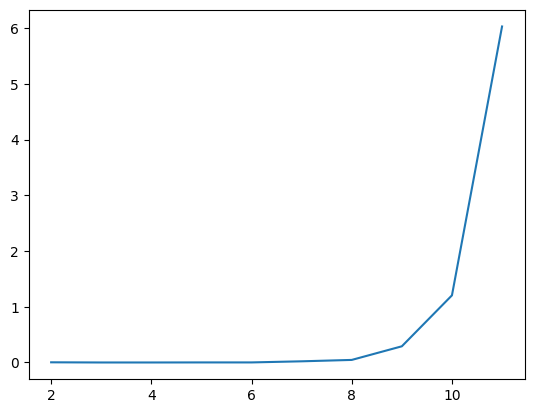

In [73]:
computing_times = []
list_N = np.arange(2,12)

for n in list_N:
    start = time.time()
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times.append(diff_time)

plt.plot(list_N, computing_times)


In [57]:
computing_times

[0.006975412368774414, 0.0, 0.0, 0.0]